<a href="https://colab.research.google.com/github/kdazcontreras/TEST-REPOSITORY/blob/main/An%C3%A1lisis%20de%20los%20datos%20hist%C3%B3ricos%20de%20existencias/ingresos%20y%20creaci%C3%B3n%20de%20un%20cuadro%20de%20mando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta 1: Utilice yfinance para extraer datos bursátiles

Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head. Suba una captura de pantalla de los resultados y el código del principio de la Pregunta 1 a los resultados de abajo.

In [1]:
import yfinance as yf

# Descargar datos históricos de las acciones de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")  # Datos del último año

# Mostrar las primeras filas
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-12 00:00:00-04:00,172.339996,173.809998,170.360001,171.050003,64506600,0.0,0.0
2024-04-15 00:00:00-04:00,170.240005,170.690002,161.380005,161.479996,100245300,0.0,0.0
2024-04-16 00:00:00-04:00,156.740005,158.190002,153.750000,157.110001,97000000,0.0,0.0
2024-04-17 00:00:00-04:00,157.639999,158.330002,153.779999,155.449997,82439700,0.0,0.0
2024-04-18 00:00:00-04:00,151.250000,152.199997,148.699997,149.929993,96098800,0.0,0.0


Pregunta 2: Utilizar Webscraping para extraer datos de ingresos de Tesla

Muestre las cinco últimas filas del marco de datos tesla_revenue utilizando la función tail. Suba una captura de pantalla de los resultados.

In [3]:
import requests
from bs4 import BeautifulSoup

# URL de la página con los ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Obtener el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')




In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL de los ingresos de Tesla en Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Encabezados para simular un navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}

# Obtener el contenido de la página
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Encontrar todas las tablas
tables = soup.find_all("table")

# Buscar la tabla que contiene los ingresos
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Extraer las filas de datos
rows = revenue_table.find_all("tr")
tesla_revenue = []

for row in rows[1:]:  # Ignorar la cabecera
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Asegurarse de que haya valor
            tesla_revenue.append([date, revenue])

# Crear el DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# Mostrar las últimas 5 filas
print(tesla_revenue_df.tail())


          Date Revenue
57  2010-09-30      31
58  2010-06-30      28
59  2010-03-31      21
60  2009-09-30      46
61  2009-06-30      27


Pregunta 3: Utilice yfinance para extraer datos bursátiles

Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos gme_data utilizando la función head. Suba a continuación una captura de pantalla de los resultados y el código del principio de la Pregunta 3.

In [13]:


import yfinance as yf
import pandas as pd

# Descargar los datos históricos de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Restablecer el índice para convertir la columna 'Date' en una columna regular
gme_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Pregunta 4: Utilizar Webscraping para extraer datos de ingresos de la GME

Muestre las cinco últimas filas del marco de datos gme_revenue utilizando la función tail. Suba una captura de pantalla de los resultados.

In [14]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL con los ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Obtener el HTML de la página
html_data = requests.get(url).text

# Parsear el HTML con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Buscar todas las tablas y seleccionar la correcta
tables = soup.find_all("table")

# Encontrar la tabla que contiene 'GameStop Annual Revenue'
for table in tables:
    if "GameStop Annual Revenue" in str(table):
        revenue_table = table
        break

# Crear listas para almacenar los datos
dates = []
revenues = []

# Extraer las filas de la tabla
for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            dates.append(date)
            revenues.append(revenue)

# Crear el DataFrame
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# Mostrar las últimas cinco filas
print(gme_revenue.tail())


          Date Revenue
57  2010-09-30      31
58  2010-06-30      28
59  2010-03-31      21
60  2009-09-30      46
61  2009-06-30      27


Pregunta 5: Representar gráficamente las acciones de Tesla

Utilice la función make_graph para representar gráficamente los datos de las acciones de Tesla, proporcione también un título para el gráfico.

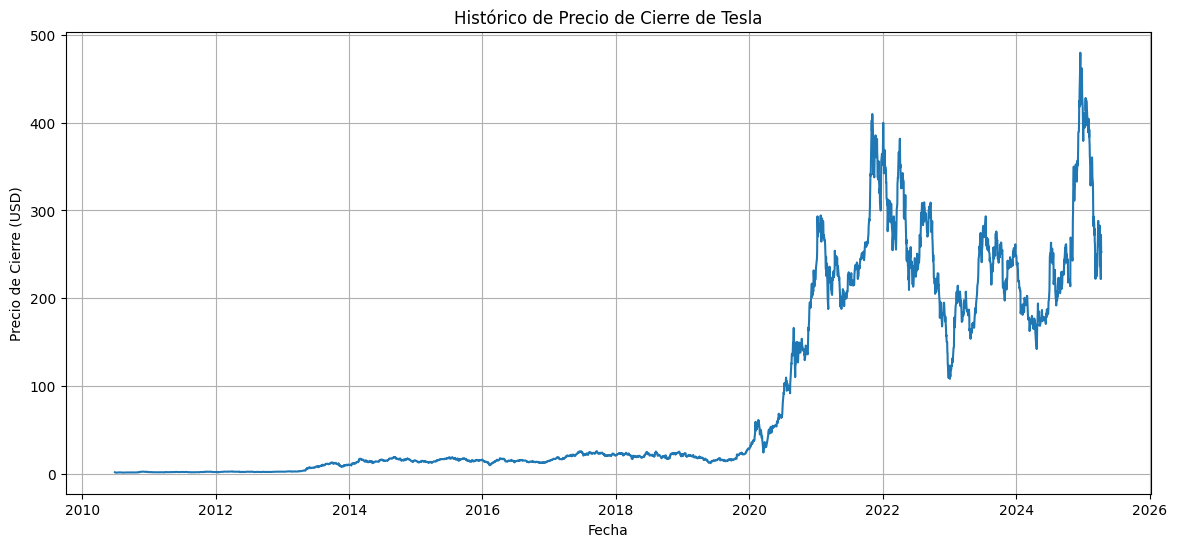

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar los datos de Tesla usando yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Restablecer el índice
tesla_data.reset_index(inplace=True)

# Función para graficar
def make_graph(stock_data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data.Date, stock_data.Close)
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.grid(True)
    plt.show()

# Usar la función para graficar Tesla
make_graph(tesla_data, 'Histórico de Precio de Cierre de Tesla')


Pregunta 6: Representar gráficamente las acciones de GameStop

Utilice la función make_graph para representar gráficamente los datos de existencias de GameStop, proporcione también un título para el gráfico.

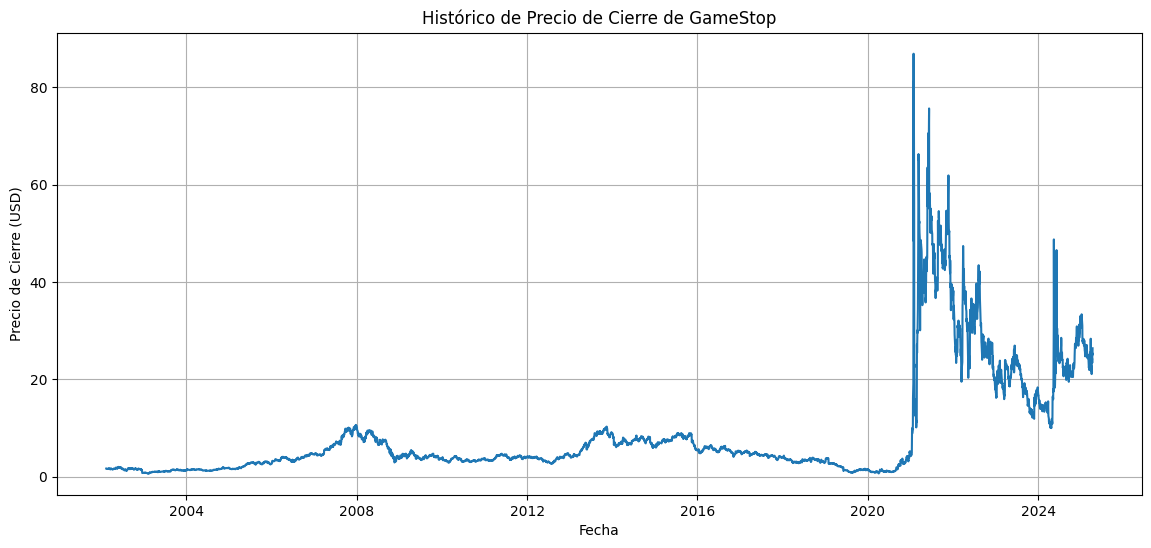

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos históricos de GME
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Restablecer el índice
gme_data.reset_index(inplace=True)

# Función para graficar (si no está definida, vuelve a incluirla)
def make_graph(stock_data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data.Date, stock_data.Close)
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.grid(True)
    plt.show()

# Graficar los datos de GME
make_graph(gme_data, 'Histórico de Precio de Cierre de GameStop')
